In [1]:
#Data
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#from tqdm import tqdm

#Metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from scipy import stats

#Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

sns.set()

In [2]:
#import dataframes
df1 = pd.read_csv('ransom_csv.csv')
df2 = pd.read_csv('benign_csv.csv')

#drop extra first column
df1 = df1.drop(df1.columns[0], axis=1)
df2 = df2.drop(df2.columns[0], axis=1)

#remove the name column (string)
df1 = df1.drop('Name', axis=1)
df2 = df2.drop('Name', axis=1)

In [11]:
# Check for duplicated rows
bool_series = df1.duplicated(keep = 'last').sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows: " + str(bool_series) + " | " + str(bool_series2))

duplicated rows: 1726 | 661


In [12]:
# Remove duplicated rows
df1 = df1.drop_duplicates(keep = 'last')
df2 = df2.drop_duplicates(keep = 'last')
bool_series = df1.duplicated().sum()
bool_series2 = df2.duplicated().sum()
print("duplicated rows: " + str(bool_series) + " | " + str(bool_series2))

# Clear all rows with only 0s:
a_series = (df1 != 0).any(axis=1)
df1 = df1.loc[a_series]
b_series = (df2 != 0).any(axis=1)
df2 = df2.loc[b_series]

duplicated rows: 0 | 0


In [14]:
df2

,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,ACCESS_COARSE_LOCATION,RECORD_AUDIO,READ_PHONE_STATE,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
0,0,0,0,0,0,0,0,0,0,1,...,2,0,0,21,19,10,0,1,0,5
1,0,0,1,1,0,0,1,1,0,1,...,0,0,0,30,11,76,3,0,0,15
6,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,3,3,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,3,1,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,6,1,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2063,0,0,0,0,0,0,0,0,0,1,...,4,0,0,30,19,3,0,0,0,24
2064,0,0,0,1,0,0,0,0,0,0,...,6,0,0,118,50,12,0,0,0,24
2065,1,1,1,0,0,1,0,0,1,1,...,3,0,0,54,6,13,0,0,0,79
2066,0,0,1,1,0,0,1,0,0,0,...,10,0,0,233,136,108,0,0,0,218


In [15]:
# substitute 0's with nan
#df1[df1 < 0] = np.nan
#df2[df2 < 0] = np.nan

#label the dataframes
df1['label'] = 'Ransomware'
df2['label'] = 'Benign'

#join the dataframes into 1 dataframe (df3)
frames = [df1, df2]
df3 = pd.concat(frames)

#shuffle!
df3 = df3.sample(frac=1)
df1 = df1.sample(frac=1)
df2 = df2.sample(frac=1)

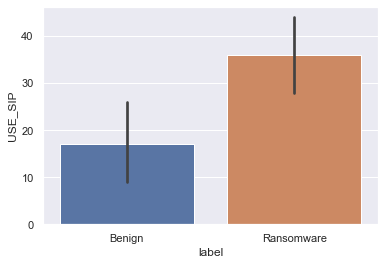

In [26]:
#from numpy import count_nonzero
#estimator=count_nonzero if you want counts, not avg
from numpy import count_nonzero

sns.barplot(y=df3['USE_SIP'], x = df3['label'], estimator = count_nonzero)
plt.show()

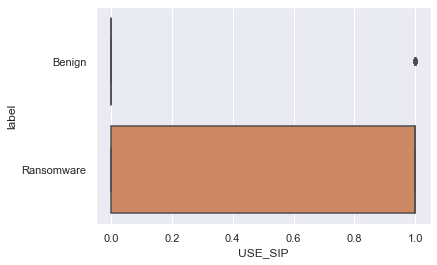

In [27]:
sns.boxplot(x = df3['USE_SIP'], y = df3['label'])
plt.show()

In [18]:
#Visualize data
#df2.describe()
df3.describe()

,READ_CALENDAR,WRITE_CALENDAR,CAMERA,READ_CONTACTS,WRITE_CONTACTS,GET_ACCOUNTS,ACCESS_FINE_LOCATION,ACCESS_COARSE_LOCATION,RECORD_AUDIO,READ_PHONE_STATE,...,getExternalCacheDir,shareIntent,readPhoneNumber,FileInputStream,getSharedPreferences,telephony,getMessageBody,getDisplayOriginatingAddress,wallpaper,crypto
count,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,...,1469.000000,1469.00000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000,1469.000000
mean,0.062628,0.058543,0.283186,0.143635,0.068754,0.198775,0.313138,0.300204,0.164057,0.362151,...,4.422737,0.00885,0.008850,71.989789,53.872703,20.403676,0.379170,0.023145,8.313819,216.532335
std,0.242375,0.234848,0.450699,0.350839,0.253122,0.399214,0.463928,0.458503,0.370454,0.480786,...,5.097047,0.19685,0.093687,78.774187,70.723178,40.504378,3.609875,0.226352,68.637282,1488.467039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,17.000000,9.000000,3.000000,0.000000,0.000000,0.000000,12.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,3.000000,0.00000,0.000000,53.000000,33.000000,6.000000,0.000000,0.000000,0.000000,50.000000
75%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,6.000000,0.00000,0.000000,95.000000,70.000000,20.000000,0.000000,0.000000,0.000000,103.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,43.000000,6.00000,1.000000,723.000000,651.000000,512.000000,82.000000,6.000000,1064.000000,32323.000000


In [19]:
# Define Validation method
# Train and validation set split
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# change label to be a category
#df3["label"] = df3["label"].astype('category')

array = df3.values

#All of the non-label columns
X = array[:, 0:-1]

#label column
y = array[:, -1]

#USING CHI2 (current (X_new))
z = SelectKBest(chi2, k=15)
X_new = z.fit_transform(X, y)
X_new.shape

#Obtain the train/validation datasets on a 80/20 split
#TODO same w/ tenfold cross val
# compare results
X_train, X_validation, Y_train, Y_validation = train_test_split(X_new, y, test_size=0.20, random_state=12)

In [20]:
cols = z.get_support(indices=True)
features_df_new = df3.iloc[:,cols]
list(features_df_new.columns)

['USE_SIP',
 'RECEIVE_WAP_PUSH',
 'DEVICE_ADMIN_ENABLED',
 'QUICKBOOT_POWERON',
 'REBOOT',
 'Cipher',
 'execSQL',
 'SQLiteDatabase',
 'openConnection',
 'getFilesDir',
 'getCacheDir',
 'FileInputStream',
 'getSharedPreferences',
 'telephony',
 'wallpaper']

In [21]:
from sklearn.ensemble import VotingClassifier

#Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr', max_iter=12000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto', max_iter=10000)))
models.append(('RF', RandomForestClassifier()))
models.append(('CNN', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.982145 (0.007974)
LDA: 0.972765 (0.006389)
KNN: 0.958330 (0.019146)
CART: 0.977017 (0.012088)
SVM: 0.961712 (0.005649)
RF: 0.981276 (0.009174)
CNN: 0.970238 (0.013827)


In [22]:
# Make predictions on validation dataset
model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 10000)
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [23]:
# Evaluate predictions
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9625850340136054
[[275   3]
 [  8   8]]
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98       278
  Ransomware       0.73      0.50      0.59        16

    accuracy                           0.96       294
   macro avg       0.85      0.74      0.79       294
weighted avg       0.96      0.96      0.96       294



In [24]:
# Making an ensamble out of multiple classifiers
clf1 = LogisticRegression(solver='liblinear', multi_class='ovr', dual=False, max_iter=12000)
clf2 = RandomForestClassifier(n_estimators=50, random_state=12)
clf3 = DecisionTreeClassifier()
clf4 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=16, max_iter = 100000)

eclf = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3), ('cnn', clf4)],
                        voting='hard')

# Make predictions on validation dataset
model = eclf
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

# Evaluate predictions
print("Ensamble accuracy: " + str(accuracy_score(Y_validation, predictions)))
print("Matrix: ")
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

# Evaluate classifier on a CV5 cross_val_score
for clf, label in zip(
    [clf1, clf2, clf3, clf4, eclf],
    ['Logistic Regression', 'Random Forest', 'Dec. Tree', 'CNN', 'Ensamble']):
    scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=5)
    print("Accuracy: %0.5f (+/- %0.5f) [%s]" %
          (scores.mean(), scores.std(), label))

Ensamble accuracy: 0.9727891156462585
Matrix: 
[[278   0]
 [  8   8]]
              precision    recall  f1-score   support

      Benign       0.97      1.00      0.99       278
  Ransomware       1.00      0.50      0.67        16

    accuracy                           0.97       294
   macro avg       0.99      0.75      0.83       294
weighted avg       0.97      0.97      0.97       294

Accuracy: 0.97754 (+/- 0.00507) [Logistic Regression]
Accuracy: 0.98502 (+/- 0.00347) [Random Forest]
Accuracy: 0.97754 (+/- 0.00593) [Dec. Tree]
Accuracy: 0.96868 (+/- 0.01088) [CNN]
Accuracy: 0.98230 (+/- 0.00253) [Ensamble]


In [ ]:
#-----------------------------------------------------------------------------------

TODO

[x] Confusion Matrix
[x] Accuracy
[x] Precision/Recall
[ ] Macro / W. Average

[x] Add barchart comparisons of features
[x] Feature Engineering / Selection

Plot for permissions (top best ones)
Compare to papers: 
    table with # of features